leasson source = https://www.youtube.com/watch?v=LAJW18ITymM&ab_channel=OneShotLearning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk') #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”,
## which are version of the notebook parameters scaled by different values. Font elements can also be scaled independently of (but relative to) the other values.

from sklearn.preprocessing import OrdinalEncoder #Encode categorical features as an integer array.

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_text #Build a text report showing the rules of a decision tree.

from sklearn.metrics import classification_report #Build a text report showing the main classification metrics.


In [2]:
url = 'https://raw.githubusercontent.com/segevstat/datalab/main/go_to_collge.csv'
df = pd.read_csv(url)
df #1000 rows × 11 columns

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


Check storng connections

In [3]:
data_cors= df.corr()
data_cors.style.applymap(lambda x: "background-color: yellow" if x>0.3 and x<1 else "background-color: white")


,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
parent_age,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873
parent_salary,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693
house_area,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267
average_grades,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133
parent_was_in_college,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038
will_go_to_college,0.042873,0.475693,0.467267,0.505133,0.048038,1.000000


Check unique values for each feature

In [4]:
for feature in df.select_dtypes(include = 'object'):
  print(feature,df.select_dtypes(include = 'object')[feature].unique())

type_school ['Academic' 'Vocational']
school_accreditation ['A' 'B']
gender ['Male' 'Female']
interest ['Less Interested' 'Very Interested' 'Uncertain' 'Not Interested'
 'Interested']
residence ['Urban' 'Rural']


In [5]:
def prep(df):

  df_uniques=df.select_dtypes(include = 'object')

  endco = OrdinalEncoder(categories = [
      df_uniques[feature].unique() if feature != 'interest ' else
      ['Not Interested', 'Less Interested','Very Interested', 'Uncertain','Interested' ]
      for feature in df_uniques.columns])

  pd.concat([
      pd.DataFrame(endco.fit_transform(df_uniques) , columns =df_uniques.columns, index = df_uniques.index),
      df.select_dtypes(exclude='object')]
      , axis=1 )
  return df.drop(columns=['will_go_to_college']), df['will_go_to_college']
# concatenating on axis=1 the index is the columns

prep(df)[0]

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False
...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True


In [6]:
pd.DataFrame(prep(df)[1])

,will_go_to_college
0,True
1,True
2,True
3,True
4,False
...,...
995,True
996,True
997,True
998,True


Try to preticd for each student - if will join to college or not

In [7]:
np.random.seed(13)

#produces different result

train, test = train_test_split(df, test_size=0.2)

train_x, train_y=prep(train)

test_x, test_y= prep(test)

In [8]:
train_x.head(2)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
133,Vocational,B,Male,Interested,Rural,50,5070000,49.3,85.72,True
233,Academic,A,Male,Uncertain,Rural,51,3510000,78.3,83.90,True


In [9]:
train_y.head(2)

133    False
233    False
Name: will_go_to_college, dtype: bool

In [10]:
test_x.head(2)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
945,Vocational,B,Female,Very Interested,Rural,50,5430000,91.9,81.08,True
452,Academic,B,Female,Uncertain,Rural,51,5040000,91.0,96.72,True


In [11]:
test_y.head(2)

945    True
452    True
Name: will_go_to_college, dtype: bool

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for type_school in train_x.columns:
  if train_x[type_school].dtype == object:
    train_x[type_school] = le.fit_transform(train_x[type_school])
  else:
     pass

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for type_school in test_x.columns:
  if test_x[type_school].dtype == object:
    test_x[type_school] = le.fit_transform(test_x[type_school])
  else:
     pass


In [13]:
class_model= DecisionTreeClassifier()

class_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [14]:
print(classification_report(class_model.predict(test_x), test_y))

              precision    recall  f1-score   support

       False       0.87      0.83      0.85        98
        True       0.84      0.88      0.86       102

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [15]:
feature_importances_= list(zip(train.columns, class_model.feature_importances_))
feature_importances_=pd.DataFrame(feature_importances_)
feature_importances_=feature_importances_.sort_values(by=1,ascending=False)
feature_importances_

,0,1
8,average_grades,0.466390
6,parent_salary,0.204232
7,house_area,0.165119
4,residence,0.041773
5,parent_age,0.038043
3,interest,0.023288
0,type_school,0.022804
9,parent_was_in_college,0.016919
1,school_accreditation,0.013222
2,gender,0.008208


In [16]:
feature_importances_['cumsum']=round(feature_importances_.iloc[:,1].cumsum(), 3)
feature_importances_.columns=["name", "score", 'cumsum']
feature_importances_

,name,score,cumsum
8,average_grades,0.466390,0.466
6,parent_salary,0.204232,0.671
7,house_area,0.165119,0.836
4,residence,0.041773,0.878
5,parent_age,0.038043,0.916
3,interest,0.023288,0.939
0,type_school,0.022804,0.962
9,parent_was_in_college,0.016919,0.979
1,school_accreditation,0.013222,0.992
2,gender,0.008208,1.000


We can see that average_grades, average_gradesparent_salary & average_gradesparent_salaryhouse_area are more than 80% of the model.

i will check some distributions

In [ ]:
pip install dataprep

DataPrep Report
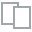
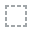
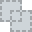
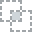
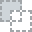
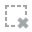
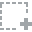
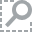
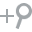
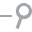
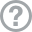
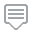
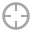
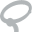
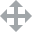
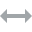
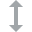
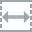
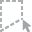
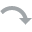
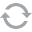
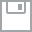
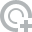
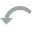
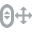
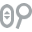
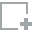
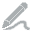
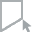
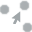
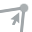
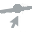

In [18]:
from dataprep.eda import create_report

create_report(train[["average_grades","parent_salary", "house_area" ]])

**Main insights:**


1.   List item
2.   List item
3. 



In [19]:
list(train['residence'].unique())

['Rural', 'Urban']

# Show differencies between 'Rural' &  'Urban' residences

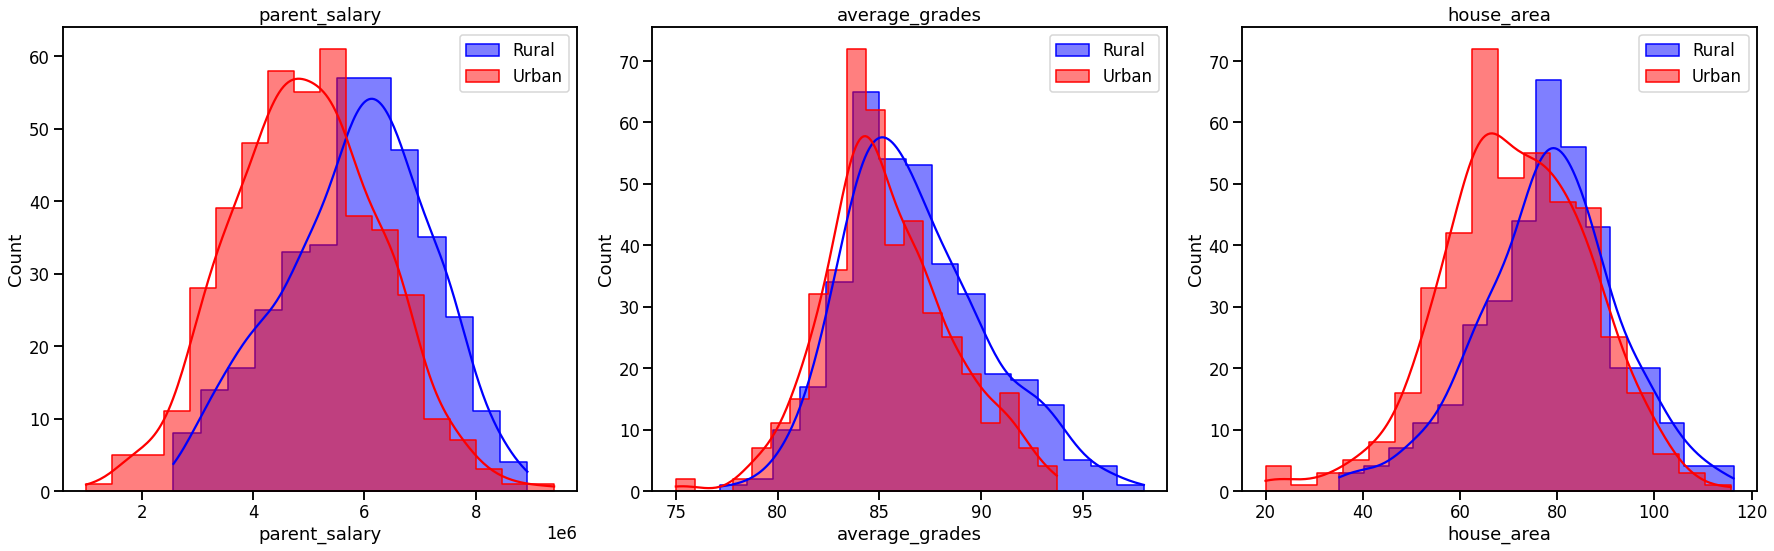

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 8))

for values, top_3 in zip(axes, [ 'parent_salary', 'average_grades','house_area']):
  
    sns.histplot(train[train['residence'] == 'Rural'][top_3],
                 color='blue',
                 label='Rural',
                 element='step',
                 kde=True,
                 ax=values)
    sns.histplot(train[train['residence'] == 'Urban'][top_3],
                 color='red',
                 label='Urban',
                 element='step',
                 kde=True, # KDE Plot described as Kernel Density Estimate is used for 
                 # ...visualizing the Probability Density of a continuous variable
                 ax=values)
    
    values.set_title(top_3)
    values.legend()
    
fig.tight_layout()
fig.show()

Second plot will be ..

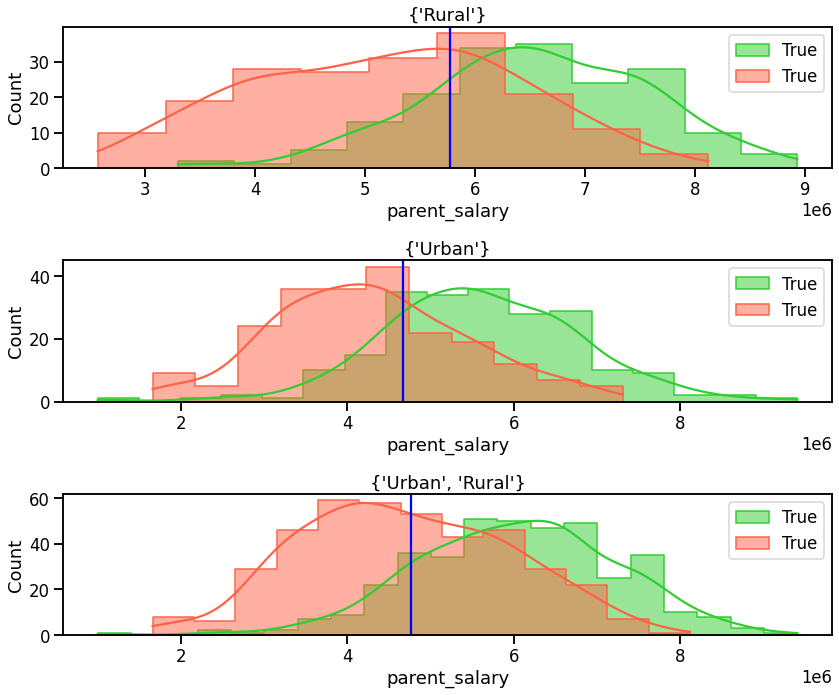

In [28]:
fig, axes = plt.subplots(nrows =3, figsize=(12,10))
for cur_ax, residence_values in zip(axes, [{'Rural'}, {'Urban'}, {'Rural', 'Urban'}]):
    subset = train[train['residence'].isin(residence_values)]

    sns.histplot(subset[subset['will_go_to_college']]['parent_salary'],
                 color='limegreen',
                 label='True',
                 element='step',
                 kde=True,
                 ax=cur_ax)
    
    sns.histplot(subset[~subset['will_go_to_college']]['parent_salary'],
                 color='tomato',
                 label='True',
                 element='step',
                 kde=True,
                 ax=cur_ax)
    
    threshold = (
        DecisionTreeClassifier(max_depth=4)
        .fit(subset[['parent_salary']], subset['will_go_to_college'])
        .tree_.threshold[0]
    )
    cur_ax.axvline(threshold, color='blue')
    cur_ax.set_title(residence_values)
    cur_ax.legend()
    
fig.tight_layout()
fig.show()

What the model has chosen?
The tree is with max_depth of 4 using DT,each chart show the cases' threshold.


In [ ]:
print(export_text(class_model, feature_names=list(train_x.columns)))

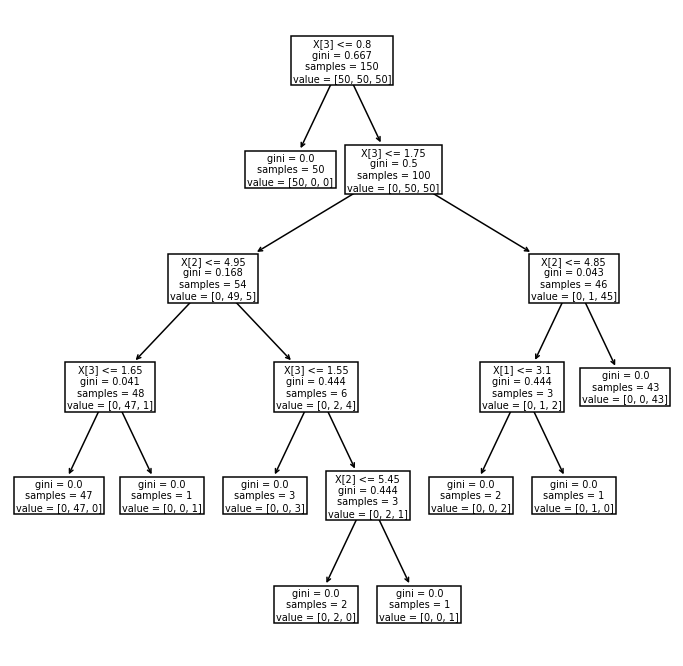

In [39]:
from sklearn.datasets import load_iris
from sklearn import tree

#figsize=(20,20)

iris = load_iris()

clf = class_model.fit(iris.data, iris.target)
plt.figure(figsize=(12,12))
tree.plot_tree(clf)
plt.show()

# Separate values into 2 models

In [54]:
for residence_value in ['Rural', 'Urban']:
  train_x, train_y = prep(train[train['residence']== residence_value])
  test_x, test_y = prep(test[test['residence']== residence_value])
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  for type_school in train_x.columns:
    if train_x[type_school].dtype == object:
      train_x[type_school] = le.fit_transform(train_x[type_school])
    else:
      pass

  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  for type_school in test_x.columns:
    if test_x[type_school].dtype == object:
      test_x[type_school] = le.fit_transform(test_x[type_school])
    else:
      pass

  ML_DT_model = DecisionTreeClassifier().fit(train_x, train_y)
  print(residence_value)
  print(classification_report(ML_DT_model.predict(test_x), test_y))

Rural
              precision    recall  f1-score   support

       False       0.77      0.96      0.86        53
        True       0.97      0.83      0.90        89

    accuracy                           0.88       142
   macro avg       0.87      0.90      0.88       142
weighted avg       0.90      0.88      0.88       142

Urban
              precision    recall  f1-score   support

       False       0.81      0.82      0.81        83
        True       0.80      0.79      0.79        75

    accuracy                           0.80       158
   macro avg       0.80      0.80      0.80       158
weighted avg       0.80      0.80      0.80       158



**Spliting the dataset into subset can help predict T/F of 'parent_was_in_college' better.**